# MACHINE LEARNING MODEL: TITANIC MACHINE LEARNING FROM DISASTER

Building a predictive model that answers the question: “what sorts of people
were more likely to survive?” using passenger data
(i.e. name, age, gender, socio-economic class, etc)

## Collect Datasets
Load the training dataset

In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import re

### Training Dataset

In [4]:
train_fname = 'train.csv'
data_train = pd.read_csv(train_fname)

### Testing Dataset

In [5]:
test_fname = 'test.csv'
data_test = pd.read_csv(test_fname)

### Dataset Info


In [6]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


### View Original Dataset 

In [8]:
data_train.head(100)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,0,3,"Shorney, Mr. Charles Joseph",male,NaN,0,0,374910,8.0500,NaN,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
97,98,1,1,"Greenfield, Mr. William Bertram",male,23.0,0,1,PC 17759,63.3583,D10 D12,C
98,99,1,2,"Doling, Mrs. John T (Ada Julia Bone)",female,34.0,0,1,231919,23.0000,NaN,S


In [9]:
data_test.head(100)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
95,987,3,"Tenglin, Mr. Gunnar Isidor",male,25.0,0,0,350033,7.7958,NaN,S
96,988,1,"Cavendish, Mrs. Tyrell William (Julia Florence...",female,76.0,1,0,19877,78.8500,C46,S
97,989,3,"Makinen, Mr. Kalle Edvard",male,29.0,0,0,STON/O 2. 3101268,7.9250,NaN,S
98,990,3,"Braf, Miss. Elin Ester Maria",female,20.0,0,0,347471,7.8542,NaN,S


### Data Column names

In [10]:
data_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [11]:
data_test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## Cleaning the dataset

### Choosing the columns required to generate the model

#### Columns to be ignored (initial)
Columns that can be ignored based on the assumption it wouldn't have any effect on the survival of passengers:
* PassengerID
* Name

#### Input parameters
* Pclass (Proxy for Socio-economic Status)
    1 = 1st (Upper)
    2 = 2nd (Middle)
    3 = 3rd (Lower)
* Sex 
* Age (In Years)
* SibSp (# of siblings / spouses aboard the Titanic) 
* Parch (# of parents / children aboard the Titanic) 
* Ticket (Ticket number)
* Fare (Passenger Fare)
* Cabin (Cabin number)
* Embarked (Port of Embarkation)
    C = Cherbourg, 
    Q = Queenstown, 
    S = Southampton

#### Output Parameters
* Survived 
    0 = No
    1 = Yes



### Unknown/Missing/Error Values in Dataset

**Note:** Unknown or missing value will be treated as 'NAN' and will be categorised as '-1'

### New Dataset (Train & Test)

In [12]:
features_drop = ['PassengerId','Name']

In [13]:
data_train_new = pd.DataFrame(data_train).drop(features_drop, axis=1)
data_train_new.head(100)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
95,0,3,male,NaN,0,0,374910,8.0500,NaN,S
96,0,1,male,71.0,0,0,PC 17754,34.6542,A5,C
97,1,1,male,23.0,0,1,PC 17759,63.3583,D10 D12,C
98,1,2,female,34.0,0,1,231919,23.0000,NaN,S


In [14]:
data_test_new = pd.DataFrame(data_test).drop(features_drop, axis=1)
data_test_new.head(100)

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,male,34.5,0,0,330911,7.8292,NaN,Q
1,3,female,47.0,1,0,363272,7.0000,NaN,S
2,2,male,62.0,0,0,240276,9.6875,NaN,Q
3,3,male,27.0,0,0,315154,8.6625,NaN,S
4,3,female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...
95,3,male,25.0,0,0,350033,7.7958,NaN,S
96,1,female,76.0,1,0,19877,78.8500,C46,S
97,3,male,29.0,0,0,STON/O 2. 3101268,7.9250,NaN,S
98,3,female,20.0,0,0,347471,7.8542,NaN,S


### Category-to-numeric Conversion
The columns 'Sex','Cabin','Embarked' needs to be converted to numerical data

#### Data Column: Sex
Category-mapping of the column "Sex":

In [15]:
data_train_new['Sex'] = pd.Categorical(data_train_new['Sex'],ordered=True,dtype='category')
cat_sex = dict(enumerate(data_train_new['Sex'].cat.categories))
# print(cat_sex)

data_test_new['Sex'] = pd.Categorical(data_test_new['Sex'],ordered=True,dtype='category')
cat_sex = dict(enumerate(data_test_new['Sex'].cat.categories))

The numeric category is then applied to the column 'Sex':

In [16]:
data_train_new['Sex'] = data_train_new.Sex.cat.codes
data_test_new['Sex'] = data_test_new.Sex.cat.codes

#### Data Column: Cabin
Category-mapping of the column "Cabin":

In [17]:
data_train_new['Cabin'] = pd.Categorical(data_train_new['Cabin'],ordered=True,dtype='category')
cat_cabin = dict(enumerate(data_train_new['Cabin'].cat.categories))
# print(cat_cabin)
data_test_new['Cabin'] = pd.Categorical(data_test_new['Cabin'],ordered=True,dtype='category')
cat_cabin = dict(enumerate(data_test_new['Cabin'].cat.categories))


In [18]:
data_train_new['Cabin'] = data_train_new.Cabin.cat.codes
data_test_new['Cabin'] = data_test_new.Cabin.cat.codes

#### Data Column: Embarked
Category-mapping of the column "Embarked":

In [19]:
data_train_new['Embarked'] = pd.Categorical(data_train_new['Embarked'],ordered=True, dtype='category')
cat_embarked = dict(enumerate(data_train_new['Embarked'].cat.categories))
# print(cat_embarked)
data_test_new['Embarked'] = pd.Categorical(data_test_new['Embarked'],ordered=True, dtype='category')
cat_embarked = dict(enumerate(data_test_new['Embarked'].cat.categories))
# print(cat_embarked)

In [20]:
data_train_new['Embarked'] = data_train_new.Embarked.cat.codes
data_test_new['Embarked'] = data_test_new.Embarked.cat.codes

#### Data Column: Age

In [21]:
age_nan = np.isnan(data_train_new['Age'])
data_age = data_train_new['Age']
data_train_new['Age'][age_nan] = -1

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [22]:
age_nan = np.isnan(data_test_new['Age'])
data_age = data_test_new['Age']
data_test_new['Age'][age_nan] = -1

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


#### Data Column: Fare

In [23]:
Fare_nan = np.isnan(data_test_new['Fare'])
data_fare = data_test_new['Fare']
data_test_new['Fare'][Fare_nan] = -1

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


#### Extract the numeric data from column: Ticket

Using regular expression to extract the numerics

In [24]:
data_train_new['Ticket']

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object

In [25]:
# lst = re.findall('[0-9.]+',data_new['Ticket'])

for line in data_train_new['Ticket']:
    line = line.rstrip()
    print(line)
#     tik_num = re.findall('\s*[0-9]+', line)
#     tik_num = re.findall('(\s([0-9]+)|[0-9]+)', line)    
#     tik_num = re.findall('(\s([0-9]+))', line)
    tik_num = re.findall('(\s[0-9]+)|(^[0-9]+)', line)
    print(tik_num)

A/5 21171
[(' 21171', '')]
PC 17599
[(' 17599', '')]
STON/O2. 3101282
[(' 3101282', '')]
113803
[('', '113803')]
373450
[('', '373450')]
330877
[('', '330877')]
17463
[('', '17463')]
349909
[('', '349909')]
347742
[('', '347742')]
237736
[('', '237736')]
PP 9549
[(' 9549', '')]
113783
[('', '113783')]
A/5. 2151
[(' 2151', '')]
347082
[('', '347082')]
350406
[('', '350406')]
248706
[('', '248706')]
382652
[('', '382652')]
244373
[('', '244373')]
345763
[('', '345763')]
2649
[('', '2649')]
239865
[('', '239865')]
248698
[('', '248698')]
330923
[('', '330923')]
113788
[('', '113788')]
349909
[('', '349909')]
347077
[('', '347077')]
2631
[('', '2631')]
19950
[('', '19950')]
330959
[('', '330959')]
349216
[('', '349216')]
PC 17601
[(' 17601', '')]
PC 17569
[(' 17569', '')]
335677
[('', '335677')]
C.A. 24579
[(' 24579', '')]
PC 17604
[(' 17604', '')]
113789
[('', '113789')]
2677
[('', '2677')]
A./5. 2152
[(' 2152', '')]
345764
[('', '345764')]
2651
[('', '2651')]
7546
[('', '7546')]
11668
[(

### Numeric Converted Dataset - Preview

In [26]:
data_train_new.head(100)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,1,22.0,1,0,A/5 21171,7.2500,-1,2
1,1,1,0,38.0,1,0,PC 17599,71.2833,81,0
2,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,-1,2
3,1,1,0,35.0,1,0,113803,53.1000,55,2
4,0,3,1,35.0,0,0,373450,8.0500,-1,2
...,...,...,...,...,...,...,...,...,...,...
95,0,3,1,-1.0,0,0,374910,8.0500,-1,2
96,0,1,1,71.0,0,0,PC 17754,34.6542,12,0
97,1,1,1,23.0,0,1,PC 17759,63.3583,91,0
98,1,2,0,34.0,0,1,231919,23.0000,-1,2


In [27]:
data_test_new.head(100)

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,1,34.5,0,0,330911,7.8292,-1,1
1,3,0,47.0,1,0,363272,7.0000,-1,2
2,2,1,62.0,0,0,240276,9.6875,-1,1
3,3,1,27.0,0,0,315154,8.6625,-1,2
4,3,0,22.0,1,1,3101298,12.2875,-1,2
...,...,...,...,...,...,...,...,...,...
95,3,1,25.0,0,0,350033,7.7958,-1,2
96,1,0,76.0,1,0,19877,78.8500,33,2
97,3,1,29.0,0,0,STON/O 2. 3101268,7.9250,-1,2
98,3,0,20.0,0,0,347471,7.8542,-1,2


### Prediction Target

In [28]:
y = data_train_new.Survived
y.shape

(891,)

### Features/Inputs 

In [29]:
features = ['Pclass','Sex','Age','SibSp','Parch','Fare','Cabin', 'Embarked']

the data will be called 'X'

In [30]:
X = data_train_new[features]

Review the data using the .describe & .head


In [31]:
X.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,0.647587,23.600640,0.523008,0.381594,32.204208,16.629630,1.529742
std,0.836071,0.477990,17.867496,1.102743,0.806057,49.693429,38.140335,0.800254
min,1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000
25%,2.000000,0.000000,6.000000,0.000000,0.000000,7.910400,-1.000000,1.000000
50%,3.000000,1.000000,24.000000,0.000000,0.000000,14.454200,-1.000000,2.000000
75%,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,-1.000000,2.000000
max,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,146.000000,2.000000


In [32]:
X.head(100)

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,22.0,1,0,7.2500,-1,2
1,1,0,38.0,1,0,71.2833,81,0
2,3,0,26.0,0,0,7.9250,-1,2
3,1,0,35.0,1,0,53.1000,55,2
4,3,1,35.0,0,0,8.0500,-1,2
...,...,...,...,...,...,...,...,...
95,3,1,-1.0,0,0,8.0500,-1,2
96,1,1,71.0,0,0,34.6542,12,0
97,1,1,23.0,0,1,63.3583,91,0
98,2,0,34.0,0,1,23.0000,-1,2


In [33]:
X_test = data_test_new[features]

In [34]:
X_test.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,2.265550,0.636364,23.838517,0.447368,0.392344,35.539564,7.200957,1.401914
std,0.841838,0.481622,17.883723,0.896760,0.981429,55.869231,18.511330,0.854496
min,1.000000,0.000000,-1.000000,0.000000,0.000000,-1.000000,-1.000000,0.000000
25%,1.000000,0.000000,9.000000,0.000000,0.000000,7.895800,-1.000000,1.000000
50%,3.000000,1.000000,24.000000,0.000000,0.000000,14.454200,-1.000000,2.000000
75%,3.000000,1.000000,35.750000,1.000000,0.000000,31.471875,-1.000000,2.000000
max,3.000000,1.000000,76.000000,8.000000,9.000000,512.329200,75.000000,2.000000


### Visualise the data

In [35]:
import seaborn as sns

In [36]:
import matplotlib.pyplot as plt

In [59]:
len_data = len(data_train_new)

#### Historgram - Sex

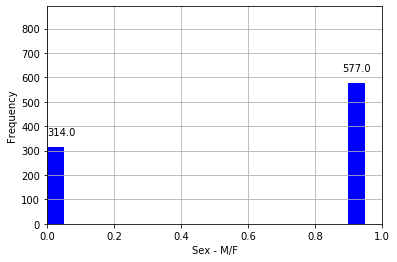

{0: 'female', 1: 'male'}

In [106]:
n, bins, patches = plt.hist(data_train_new.Sex,color='blue', width=0.05)
plt.ylabel('Frequency')
plt.xlabel('Sex - M/F')
plt.axis([min(data_train_new.Sex),max(data_train_new.Sex),0,len_data])
plt.grid(True)
plt.annotate(n[0],xy=(0,n[0]+50))
plt.annotate(n[len(n)-1],xy=(0.88,n[len(n)-1]+50))
plt.show()
cat_sex

#### Historgram - Pclass

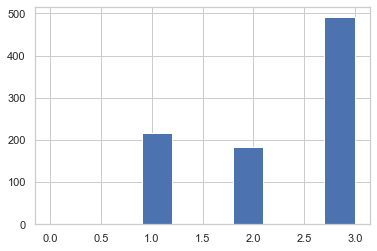

In [166]:
plt.hist(data_train_new.Pclass, range=(0,3))
plt.show()

#### Historgram - SibSp

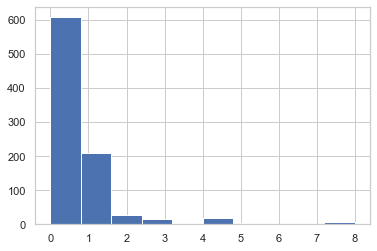

In [167]:
plt.hist(data_train_new.SibSp)
plt.show()

#### Historgram - Parch

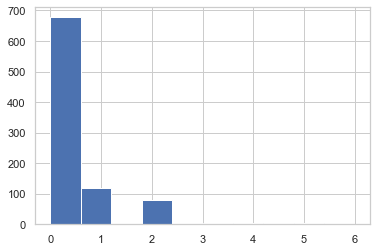

In [170]:
plt.hist(data_train_new.Parch)
plt.show()

#### Historgram - Fare

#### Historgram - Cabin

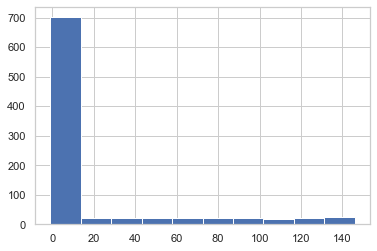

In [173]:
plt.hist(data_train_new.Cabin)
plt.show()

#### Historgram - Embarked

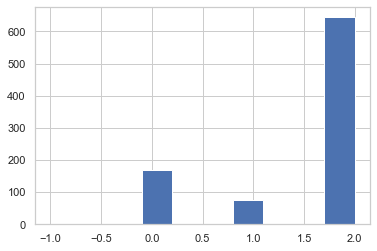

{0: 'C', 1: 'Q', 2: 'S'}

In [172]:
plt.hist(data_train_new.Embarked)
plt.show()
cat_embarked

#### Correlation Matrix

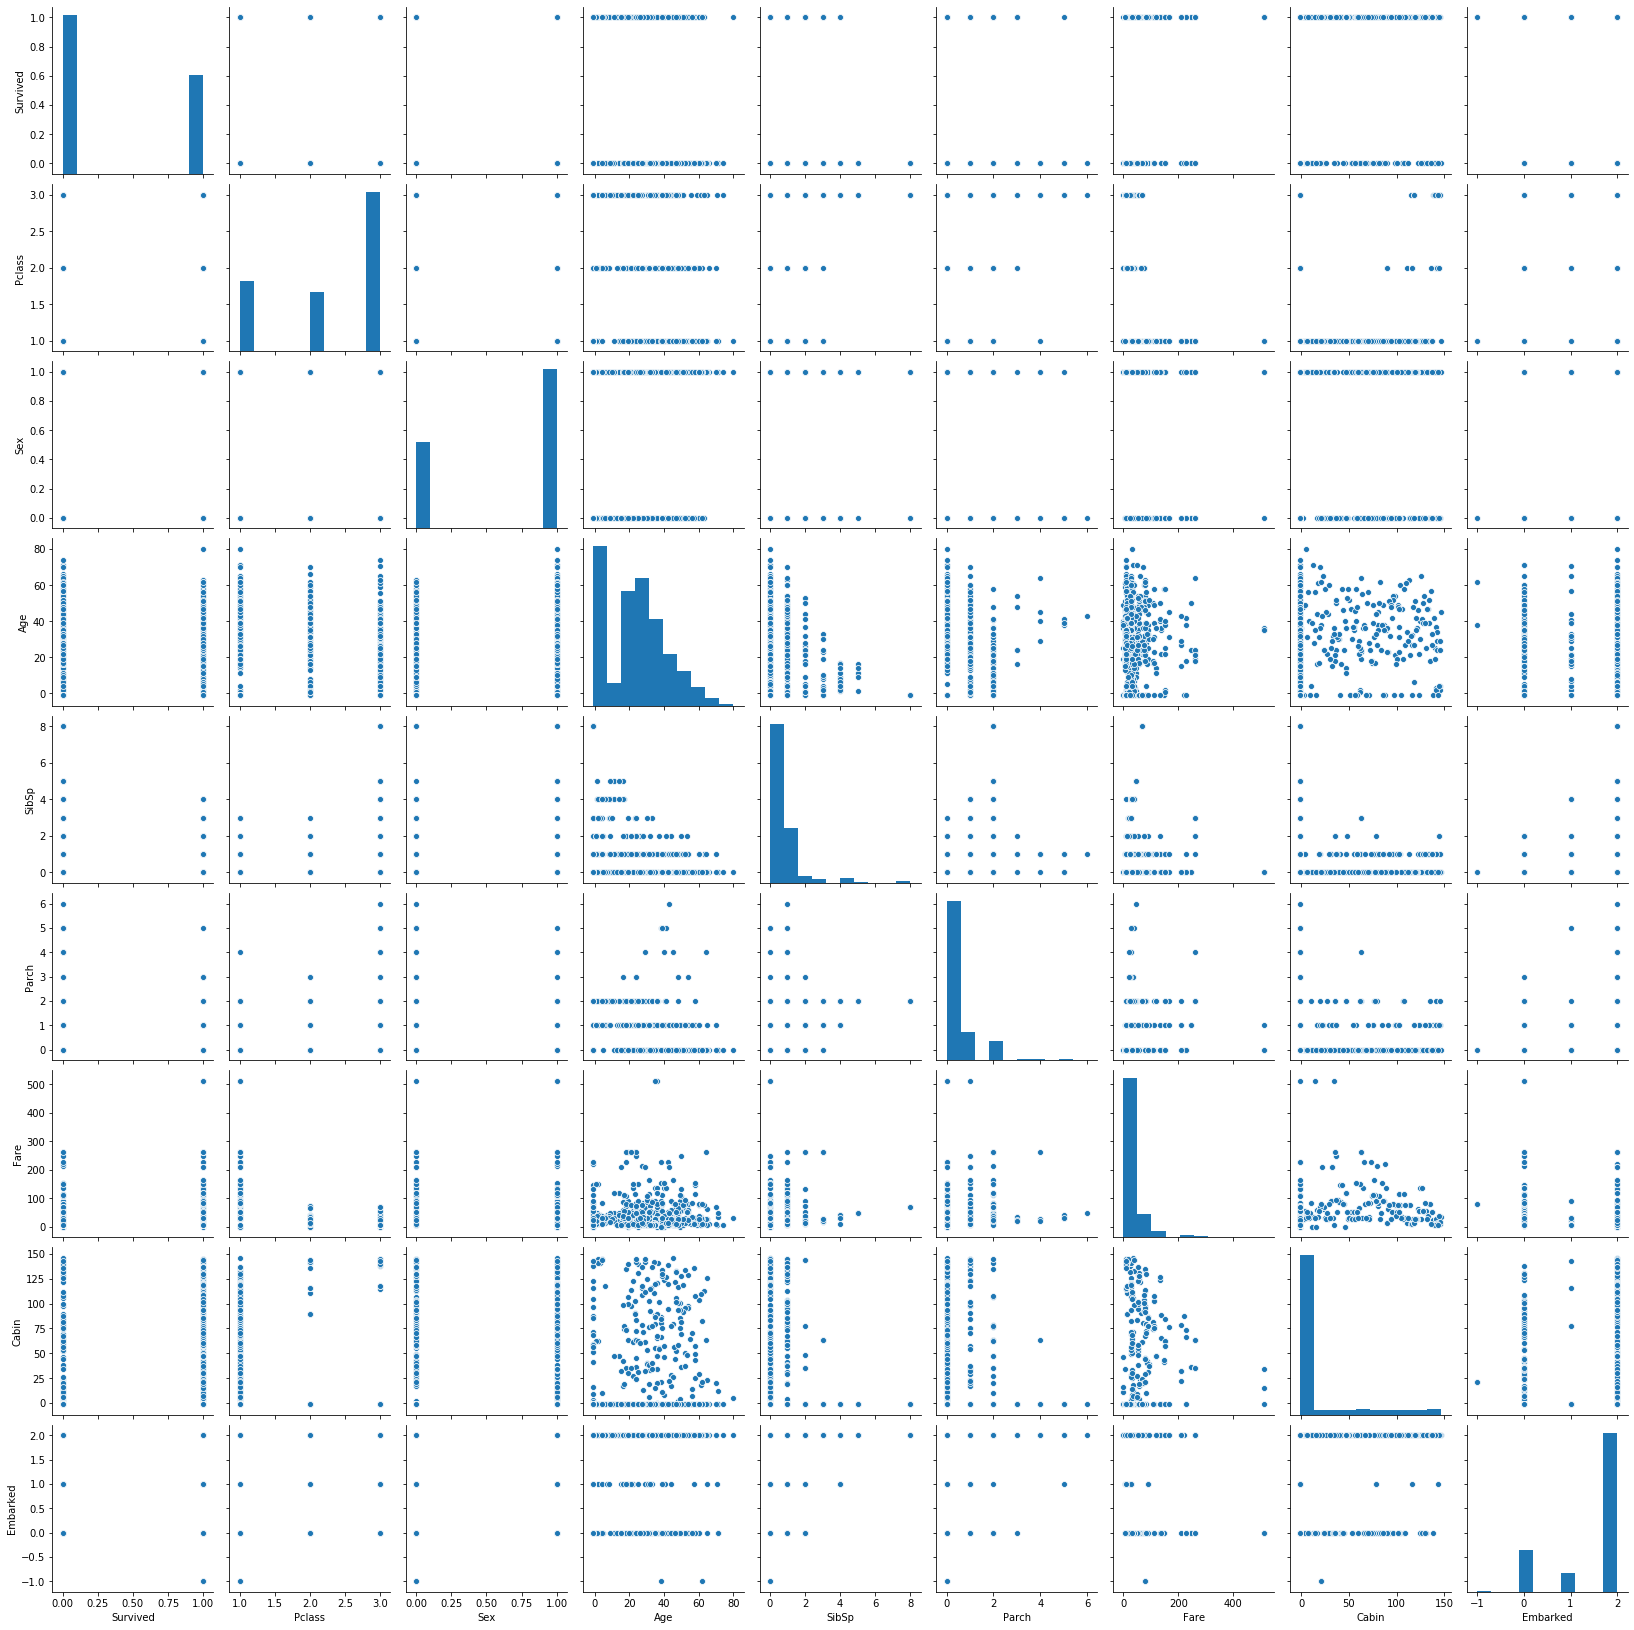

In [137]:
sns.pairplot(data_train_new)

## Build the model

### Define the model: Random forest model

A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

Source:https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [116]:
from sklearn.ensemble import RandomForestClassifier

In [117]:
# Create the model with 100 trees
titanic_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)

## Train the network

### Fit the model using Training Dataset

In [118]:
titanic_model.fit(X,y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

## Predict

In [119]:
X_test = data_test_new[features]
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,34.5,0,0,7.8292,-1,1
1,3,0,47.0,1,0,7.0000,-1,2
2,2,1,62.0,0,0,9.6875,-1,1
3,3,1,27.0,0,0,8.6625,-1,2
4,3,0,22.0,1,1,12.2875,-1,2


In [120]:
predictions = titanic_model.predict(X_test)

In [121]:
print('The predictions for passengers survived:')
print(titanic_model.predict(X_test))
predictions = titanic_model.predict(X_test)

The predictions for passengers survived:
[0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 0 0
 1 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 0 0 1 0 0 0]


### Pclass Vs Survived

In [122]:
output = pd.DataFrame({'Pclass': data_test_new.Pclass, 'Survived': predictions})
print(output)

     Pclass  Survived
0         3         0
1         3         0
2         2         0
3         3         0
4         3         0
..      ...       ...
413       3         0
414       1         1
415       3         0
416       3         0
417       3         0

[418 rows x 2 columns]


### Sex Vs Survived

In [123]:
output = pd.DataFrame({'Sex': data_test_new.Sex, 'Survived': predictions})
print(output)

     Sex  Survived
0      1         0
1      0         0
2      1         0
3      1         0
4      0         0
..   ...       ...
413    1         0
414    0         1
415    1         0
416    1         0
417    1         0

[418 rows x 2 columns]


### Age Vs Survived

In [124]:
output = pd.DataFrame({'Age': data_test_new.Age, 'Survived': predictions})
print(output)

      Age  Survived
0    34.5         0
1    47.0         0
2    62.0         0
3    27.0         0
4    22.0         0
..    ...       ...
413  -1.0         0
414  39.0         1
415  38.5         0
416  -1.0         0
417  -1.0         0

[418 rows x 2 columns]


### SibSp Vs Survived

In [125]:
output = pd.DataFrame({'SibSp': data_test_new.SibSp, 'Survived': predictions})
print(output)

     SibSp  Survived
0        0         0
1        1         0
2        0         0
3        0         0
4        1         0
..     ...       ...
413      0         0
414      0         1
415      0         0
416      0         0
417      1         0

[418 rows x 2 columns]


### Parch Vs Survived

In [126]:
output = pd.DataFrame({'Parch': data_test_new.Parch, 'Survived': predictions})
print(output)

     Parch  Survived
0        0         0
1        0         0
2        0         0
3        0         0
4        1         0
..     ...       ...
413      0         0
414      0         1
415      0         0
416      0         0
417      1         0

[418 rows x 2 columns]


### Fare Vs Survived

In [127]:
output = pd.DataFrame({'Fare': data_test_new.Fare, 'Survived': predictions})
print(output)

         Fare  Survived
0      7.8292         0
1      7.0000         0
2      9.6875         0
3      8.6625         0
4     12.2875         0
..        ...       ...
413    8.0500         0
414  108.9000         1
415    7.2500         0
416    8.0500         0
417   22.3583         0

[418 rows x 2 columns]


### Cabin Vs Survived

In [128]:
output = pd.DataFrame({'Cabin': data_test_new.Cabin, 'Survived': predictions})
print(output)

     Cabin  Survived
0       -1         0
1       -1         0
2       -1         0
3       -1         0
4       -1         0
..     ...       ...
413     -1         0
414     22         1
415     -1         0
416     -1         0
417     -1         0

[418 rows x 2 columns]


### Embarked Vs Survived

In [129]:
output = pd.DataFrame({'Embarked': data_test_new.Embarked, 'Survived': predictions})
print(output)

     Embarked  Survived
0           1         0
1           2         0
2           1         0
3           2         0
4           2         0
..        ...       ...
413         2         0
414         0         1
415         2         0
416         2         0
417         0         0

[418 rows x 2 columns]


In [130]:
output.to_csv('Pclass_submission.csv', index=False)
print('Your submission was successfully saved!')

Your submission was successfully saved!


## Evaluate the model

### Confusion Matrix

In [131]:
from sklearn.metrics import confusion_matrix

In [132]:
y[0:418].shape
confusion_matrix(y[0:418], predictions)

array([[173,  82],
       [124,  39]])

In [133]:
predictions.shape

(418,)